In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
X = df['Rim_Center_X'].values.reshape(-1, 1)
y = df[['Speed', 'Angle']].values

In [4]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [5]:
model_data = {
    'model': model,
    'poly': poly
}
with open('model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

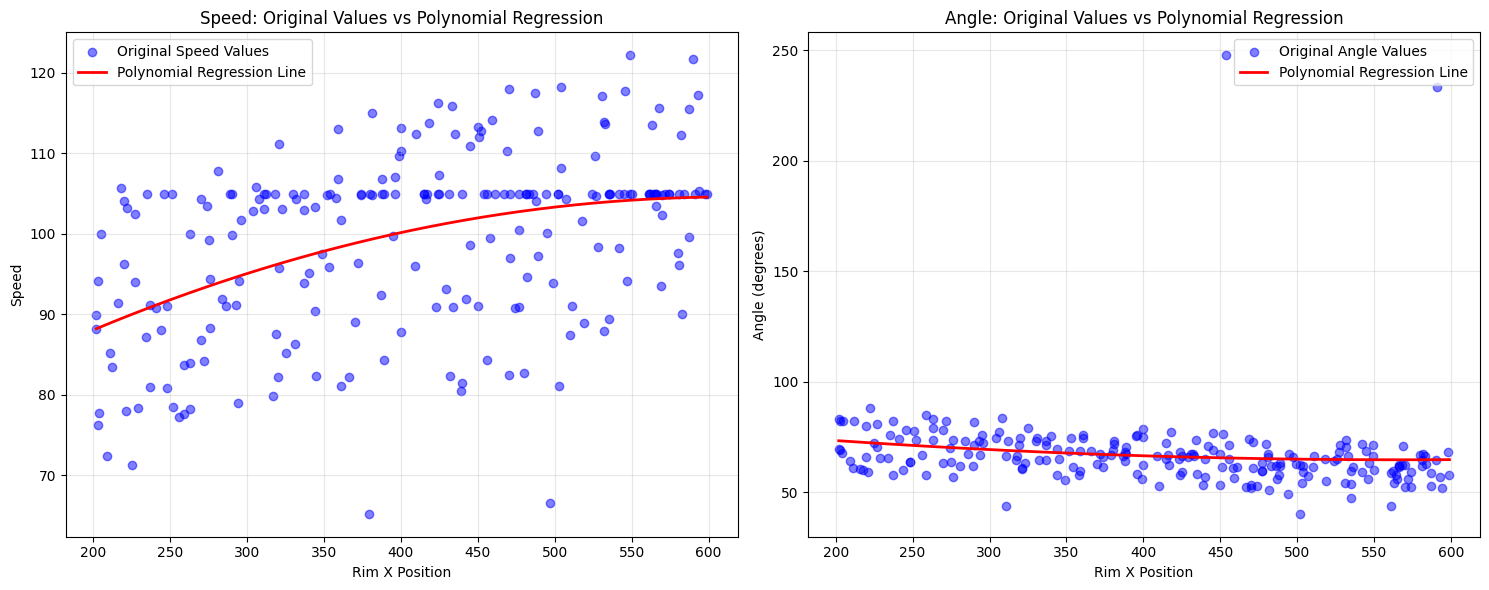

In [6]:
x_smooth = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_poly_smooth = poly.transform(x_smooth)
predictions_smooth = model.predict(X_poly_smooth)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X, y[:, 0], color='blue', alpha=0.5, label='Original Speed Values')
plt.plot(x_smooth, predictions_smooth[:, 0], 'r-', linewidth=2, label='Polynomial Regression Line')
plt.xlabel('Rim X Position')
plt.ylabel('Speed')
plt.title('Speed: Original Values vs Polynomial Regression')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, y[:, 1], color='blue', alpha=0.5, label='Original Angle Values')
plt.plot(x_smooth, predictions_smooth[:, 1], 'r-', linewidth=2, label='Polynomial Regression Line')
plt.xlabel('Rim X Position')
plt.ylabel('Angle (degrees)')
plt.title('Angle: Original Values vs Polynomial Regression')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()